In [36]:
print("Hello")

Hello


In [37]:
## load libraries 

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.optimizers import Adam
import matplotlib.pyplot as plt

## LOAD THE DATA

In [39]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# PREPROCESSING

In [40]:
# print(y_train[0])
y_train = to_categorical(y_train)

y_test = to_categorical(y_test) 
# print(y_train[0])

## BUILD ARCHITECTURE

In [41]:
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten(input_shape=(32,32, 3)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## COMPILE

In [42]:
model.compile(optimizer= 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Train

In [44]:
result = model.fit(X_train, y_train, epochs=32, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2087 - loss: 22.1924 - val_accuracy: 0.3227 - val_loss: 1.9252
Epoch 2/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3588 - loss: 1.7926 - val_accuracy: 0.3840 - val_loss: 1.7331
Epoch 3/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4370 - loss: 1.5589 - val_accuracy: 0.4298 - val_loss: 1.6200
Epoch 4/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4960 - loss: 1.4058 - val_accuracy: 0.4644 - val_loss: 1.5480
Epoch 5/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5357 - loss: 1.2967 - val_accuracy: 0.4646 - val_loss: 1.5993
Epoch 6/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5701 - loss: 1.2164 - val_accuracy: 0.4569 - val_loss: 1.5959
Epoch 7/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5977 - loss: 1.1326 - val_accuracy: 0.4929 - val_loss: 1.5170
Epoch 8/32
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6239 - loss: 1.0609 - val_accuracy: 0

# Evaluate

In [45]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.4774 - loss: 3.3530
Test Loss: 3.3936586380004883, Test Accuracy: 0.4740000069141388


## VISUALISATION

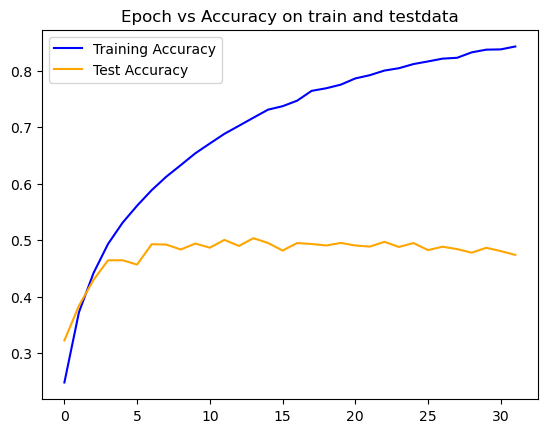

In [46]:
plt.plot(result.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(result.history['val_accuracy'], label='Test Accuracy', color='orange')
plt.legend()
plt.title("Epoch vs Accuracy on train and testdata")
plt.show()